# **Summary of Exploratory Data Analysis**


*   There are five attributes that define the dataset: station_id, station name, date, daytype, rides. Daytypes are as follows: W=Weekday, A=Saturday, U=Sunday/Holiday.
*   The number of data points from 2002 to 2016 (training set) is 779,648.
*   The maximum number of rides in a single day is 36,323 at Belmont-North Main Station on June 28, 2015 (Pride parade was organized on this day in Chicago).
*   An average CTA station gives about 3,310 rides every day with a standard deviation of 3,177.
*   There is atleast one station that doesn't have any passengers on a day (min value of rides is 0). I suspect this is due to some error. It's hard to believe that there wouldn't be any passengers at a station on a given day in Chicago.
*    The most popular stations are Clark/Lake (75,586,724), Lake/State (73,809,807), and Chicago/State (71,428,218).
*    The least popular stations are Cermak-McCormick Place (842,622), Oakton-Skokie (1,182,961), and Kostner (1,831,883).
*   The total number of passengers from 2002-2016 is highest during weekdays(W) and lowest on Sundays/Holidays(U) which is intuitive because people travel to work during weekdays. The number of passengers on Saturday(A) is a little more than that of on Sunday/Holiday(U); this could be because people party, run more errands on Saturday. The number of rides on weekdays is about 10 times the number of rides on Saturday or Sunday/Holiday. Similar trend is observed in the number of rides at each station.
*   To further analyze this trend, I plotted number of passengers on Weekdays(W), Saturday(A), Holiday/Sunday(U) at Clark/Lake Station (most popular) and Cermak-McCormick Place Station (least popular) for the year 2016. There is a stark difference between the number of rides at these two stations (please check the plots in the notebook below). For Clark/Lake, typically there is a huge gap between the number of riders on weekdays vs the other days except for a few downward spikes which could be because of bad weather (Chicago has extreme winter) and people didn't go to work. The huge gap between weekdays and the other days is intuitive since people use the trains to go to work. For Cermak-McCormick Place, the gap between weekdays and other days is not large. This could be because this station is newly built or it's not located at a place where many businesses are set up in Chicago. 
*  The total number of rides typically increase every year for the most popular station and for all the stations combined. It decreases by a small number for some years. But the overall trend is increasing. 

*  An interesting observation for Cermak-McCormick Place station (least popular station), it is least popular because it started functioning in 2015. Initially I thought that maybe there are some stations that don't contribute much to the total number of rides and we could ignore them. For the year 2016, Clark/Lake station gave \~6MM rides (\~3% of the total rides) while Cermak-McCormick Place station gave \~400K rides (\~0.2% of the total rides). Although the percentage share of the rides by Cermak-McCormick Place station is one order magnitude lesser than the share of rides by Clarl/Lake station, it's not significantly lesser. So, it wouldn't be wise to ignore less popular stations.

*  To establish the baseline performance of a model, I checked the change in the total number of rides for all stations from the year 2016 to 2017 daily, monthly, and yearly. The percentage change in total number of rides from 2016 to 2017 is 3.2%. Montly average percentage change (calculate change in the total numbe rof rides each month) in rides is 3.6%. But the avaerage daily change (change in total number of rides on January 1 and so on) is 31%. The reason behind this is that a particular day could be a weekday in 2016 but a weekend in 2017 and viceversa. We don't observe this phenomenon in monthly and yearly change because on an average there are same number of weekdays and weekends in a month and a year. Hence, the model should beat 31%.





# **Summary of Machine Learning Model**


*   The metric used for this problem is average percentage error. Suppose there are n data points on which the model is evaluated, then average percentage error = $\frac{1}{n}\sum_{i=1}^{n}\frac{|y_{pred}(i)-y(i)|}{y(i)} $ where $y_{pred}$ is the model prediction and $y$ is the true value. This metric is appropriate for the problem because it gives a measure of margin of how much the predicted value deviates from the true value.

*   There are a few data points that have the label $y=0$. If we plug in this value in the formula for metric, the metric will blow up to infinity. To resolve this, I restricted the dataset to the points that have atleast 100 rides. The fraction of points in the training set with less than 100 rides is 1.63% and the fraction of points in the test set with less than 100 rides is 1.02%. So, I am removing a very small number of points to set up the model. The reasoning behind this is that such stations/days can get on an average 1 train every 30 minutes and they would be enough to supply the demand of 100 rides (I am assuming atleast 10 people enter a train at a station). 

*   The feature vectors are categorical. Linear regression wouldn't work for this problem as the features are not quantifiable. I would use tree based algorithms: Random Forest and XGBoost because tree based algorithms separate similar data points at the splitting node. These methods are appropriate because of the way I have encoded the dataset.

*   Station name is dropped from the model because we already have station id to uniquely identify the station. So, the model has three features station id, date, daytype to predict the number of rides (label).

*   Since common libraries like sklearn, xgboost require feature vectors to be numeric, it's necessary to encode the feature vectors: (a) Weekdays are replaced by 0, Saturdays are replaced by 1, and Holidays/Sunday are replaced by 2. (b) Dates are replaced by day of the year starting from Jan 1 of that particular year. For example, 02/03/2009 will be encoded by 34. This encoding of the date feature would help the model to detect dependence on the days around the date in the current year and on the same date in the previous years.

*   The goal is to forecast daily rides for the year 2017 with the given data. So, I kept 20% of randomly shuffled data from the year 2016 as the dev set. The remaining data was used for training.

*   It is my intuition that only 2-3 years of historical data will make any significant contribution to predictions. In other words, the data only from the year 2014-2016 should be able to predict the rides for the year 2017. This is based on the fact that the total number of rides typically increases every year. For example, the data from 2003 (distant history) will have no effect on predictions for 2017. To study this behaviour, I added data from 2015 to 2010 incrementally (Initially only 2015 data is added. In the next iteration 2014 data is added and so on) to the training data and assessed the model performance. I used default parameters for random forest regression. For XGBoost, I used learning rate = 0.2 (for faster convergence), number of estimators = 1000 (to decrease variance).

* I found from the above analysis that including more historical data from previous years deteriorates the model performance. Random Forest model has low bias and high variance. XGBoost model has high bias and low variance. Training error (4.48%) and Dev error (9.7%) are lowest for the random forest model with historical data until 2015. So, I selected this model for further evaluations. Although the selected model has high variance, it could be further improved by tuning the hyperparameters.

*  I used 3-fold cross validation to tune the hyperparameters of the random forest model. The mean percentage error of the best estimator is 9.38%. This is a very small improvement from the model with default parameters. I think an extensive search of hyperparameters is required to further improve the model. Unfortunately, I couldn't spend a lot of time on this. So, I went ahead with the best model found using grid search cross validation. The parameters are: max depth of tree = 120 , minimum samples in the leaf node = 1, minimum samples for splitting a node = 10, number of trees in random forest = 150.






# **Results on Test Set**
The test set is the number of rides for each day of the year 2017 at each station.

The average percentage error between the true values and the model prections for the number of rides in 2017 is **12.5%.**

For planning the transport system, it's necessary to check the performance of the model on the top 80 percentile (this number could change depending on planning goals) stations and days. It's interesting to note that out of the total data points (52,172) in 2017, only 24,505 (\~ 46.5%) contribute to 80% of the total rides. Hence, it's important to focus on these stations and days as they will have a significant impact on the train system. To find the mean percentage error for these data points, I sorted the data from the year 2017 in descending order of rides. The percentage error was found to be 9.43%. Note that this is very close to the mean percentage error of the best estimator found by 3-fold cross validation. This indicates that the training set and the top 80 percentile of the test set have similar distributions and the model is able to perform equally well on the top 80 percentile set.

**Additional Remarks:**
The error is still quite that is achieved by the model. I think a more extensive hyperparameter search and feature engineering would help to improve the model performance. I tried an approach to include more features in the training data like Rides in last 1 year, Rides in last 2 years, and Rides in last 3 years for the same station on the same day in previous years. This approach gave much poorer performance (Test error was more than 100%). I think the reason of its poor performance was that it's possible that some day is a weekday in the current year but could have been a Saturday/Holiday in previous years. This would give the model conflicting feature information about the current day and thus result in bad prediction.

Unfortunately, I couldn't think of any other way to improve the model performance. 





# **Evaluation of the model to ensure it would be robust for production usage**


*   Business Requirements:

> 1.  Do we want to know the exact value on each day at each stations?
>> It's important to know if we want to predict rides at each station on each day with high accuracy. If this is the case, then this model needs a lot of improvement. I think to plan the city transport system extensively, it's necessary to know the frequency of passengers entering a station during the given hour of the day. This would help in determining peak hours and busy stations. The frequency of trains should increase during peak hours. In general, the busy stations should be given more importance.


> 2.  Do we want to know the days where the rides are peaking?
>> As we discussed in the last section that only 46.5% of dataset accounts for 80% of the rides. This means that there are specific days and stations where it's expected to have large number of passengers. Therefore, it's important to plan for these instances extensively. For example, on June 28, 2015, Pride Parade was organized in Chicago. To ensure passengers don't experience any rush/difficulties, we need to increase the frequency of trains around the location of the event and around the residential areas in Chicago. Similar strategy could be applied for other events like Elections Day, New Year's Eve, and a popular football game day. In such events, the frequency at lesser busy stations should decrease so that trains run on time.


*  It's possible that model performance deteriorates over time. This could be due to change in population, sudden weather changes (snow storm, polar vortex), new major events that didn't take place in previous years, US Presidential Election Year (once in four years) etc. Therefore, continuous training and evaluation is required. A good startegy would be to retrain every few weeks when there are no major changes in the timeframe from previous days/months/years and retrain every few days when there are some major events happening in Chicago.

*  This notebook takes about 40 minutes to execute on Google Colab which runs on Intel(R) Xeon(R) CPU @ 2.20GHz with 12GB RAM. It takes about 25 minutes to perform cross validation with given grid parameters. This runtime will increase further when we perform cross validation on a larger grid. Runtime could be reduced by using multiple GPUs. The size of dataset is 36.8MB. So, we should have atleast 500MB of disk space as we create and manipulate several dataframe s in Pandas. I have saved the best random forest model learned through cross validation in this script. The size of this file is 249.3MB. If we retrain the model everyday, there could be some issues with storage due to large size of the model. So, the model must be stored according to the storage space available. For example, very old models can be discarded (a few months old if retraining every few weeks).

In [101]:
# comment this out if not using google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
# change the file path here
#!ls /content/drive/MyDrive
%cd /content/drive/MyDrive/CTA _Ridership/Dataset

/content/drive/MyDrive/CTA _Ridership/Dataset


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import joblib
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [108]:
# Load data
# change next line according to the file name/path
L_rides = pd.read_csv('CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv',sep = ',')
L_rides.head()

,station_id,stationname,date,daytype,rides
0,41280,Jefferson Park,12/22/2017,W,6104
1,41000,Cermak-Chinatown,12/18/2017,W,3636
2,40280,Central-Lake,12/02/2017,A,1270
3,40140,Dempster-Skokie,12/19/2017,W,1759
4,40690,Dempster,12/03/2017,U,499


In [33]:
# Change date column to proper date format (mm-dd-yyyy)
L_rides['date'] = pd.to_datetime(L_rides['date'])
L_rides.head()

,station_id,stationname,date,daytype,rides
0,41280,Jefferson Park,2017-12-22,W,6104
1,41000,Cermak-Chinatown,2017-12-18,W,3636
2,40280,Central-Lake,2017-12-02,A,1270
3,40140,Dempster-Skokie,2017-12-19,W,1759
4,40690,Dempster,2017-12-03,U,499


Splitting the dataset such that training data is from Jan 1, 2002 to Dec 31, 2016 and test data is from Jan 1, 2017 to Dec 31, 2017 

In [34]:
# Divide the dataset into train and test
L_rides_train = L_rides[(L_rides['date'] >= '01/01/2002') & (L_rides['date'] <= '12/31/2016')]
L_rides_test = L_rides[(L_rides['date'] >= '01/01/2017') & (L_rides['date'] <= '12/31/2017')]

In [35]:
L_rides_train.describe()

,station_id,rides
count,779648.000000,779648.000000
mean,40760.336524,3310.724129
std,445.024782,3177.348893
min,40010.000000,0.000000
25%,40370.000000,1128.000000
50%,40750.000000,2330.000000
75%,41150.000000,4358.000000
max,41690.000000,36323.000000


The above table tells some statistics about the training data. Count tells that there are a total of 779,648 data points. A few more interesting observations:

1.   The maximum number of rides in a single day is 36,323 at station 
2.   An average CTA station gives about 3,310 rides every day.
3. There is atleast one station that doesn't have any passengers on a day (min value of rides is 0).



In [36]:
# Highest number of rides in a day
L_rides_train[L_rides_train['rides']==36323]

,station_id,stationname,date,daytype,rides
812412,41320,Belmont-North Main,2015-06-28,U,36323


In [37]:
# group datapoints with same stations together
station_group = L_rides_train.groupby(['stationname'])
station_totals = pd.DataFrame(station_group['rides'].sum())
station_totals.sort_values(ascending=False,by='rides',inplace=True)
station_totals
#station_totals['rides'].sum()

,rides
stationname,
Clark/Lake,75586724
Lake/State,73809994
Chicago/State,71428369
95th/Dan Ryan,58777913
Belmont-North Main,57756113
...,...
King Drive,3124208
Dempster-Skokie,2885112
Kostner,1836565


**Following are the 5 most popular stations from 2002-2016:**

In [38]:
station_totals.head(5)

,rides
stationname,
Clark/Lake,75586724
Lake/State,73809994
Chicago/State,71428369
95th/Dan Ryan,58777913
Belmont-North Main,57756113


**Following are the 5 least popular stations from 2002-2016:**

In [39]:
station_totals.tail(5)

,rides
stationname,
King Drive,3124208
Dempster-Skokie,2885112
Kostner,1836565
Oakton-Skokie,1184581
Cermak-McCormick Place,842812


In [40]:
# group data with daytype together
day_group = L_rides_train.groupby(['daytype'])
day_totals = pd.DataFrame(day_group['rides'].sum())
day_totals

,rides
daytype,
A,254238366
U,205913139
W,2121047941


We observe from the above table that the number of passengers is highest during weekdays(W) and lowest on Sundays/Holidays(U) which is intuitive because people travel to work during weekdays. The number of passengers on Saturday(A) is a little more than that of on Sunday/Holiday(U); this could be because people party, run more errands on Saturday.

In [41]:
# group stations by daytype
station_day_group = L_rides_train.groupby(['stationname','daytype'])
station_day_totals = pd.DataFrame(station_day_group['rides'].sum())
#station_day_totals.sort_values(ascending=False,by='daytype',inplace=True)
station_day_totals

rides
stationname        daytype          
18th               A          681718
                   U          549632
                   W         5694052
35-Bronzeville-IIT A         1072482
                   U          847546
...                              ...
Western/Milwaukee  U         1463152
                   W        16822088
Wilson             A         2974991
                   U         2256659
                   W        21798623

[438 rows x 1 columns]

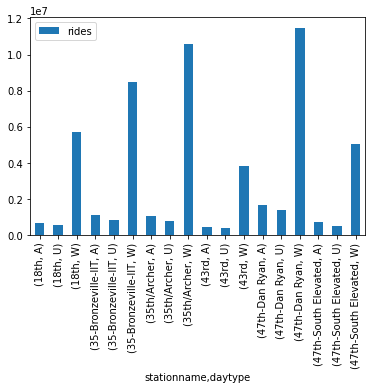

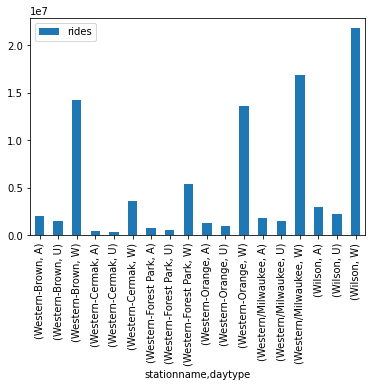

In [42]:
# plot number of rides with different daytypes for different stations
station_day_totals.head(18).plot(kind='bar')
station_day_totals.tail(18).plot(kind='bar')

The above two plots show that for a given station, the number of rides on weekdays is significantly higher than that on Staurday/Holiday. (I have plotted this only for the first 6 and the last six stations in the dataset for better visibility, the stationnames are arranged in alhabetical order).  

In [ ]:
# analyze the distribution of rides at the most and least popular stations
Clark_lake_rides = L_rides_train[(L_rides_train['stationname'] == 'Clark/Lake') &
                       (L_rides_train['date'] >= '01/01/2016') &
                       (L_rides_train['date'] <= '12/31/2016')]
Cermak_McCormick_rides = L_rides_train[(L_rides_train['stationname'] == 'Cermak-McCormick Place') &
                       (L_rides_train['date'] >= '01/01/2016') &
                       (L_rides_train['date'] <= '12/31/2016')]

Clark_lake_rides_1 = Clark_lake_rides[(Clark_lake_rides['daytype']=='W')]
Clark_lake_rides_1.sort_values(ascending=True,by='date',inplace=True)
Clark_lake_rides_2 = Clark_lake_rides[(Clark_lake_rides['daytype']=='A')]
Clark_lake_rides_2.sort_values(ascending=True,by='date',inplace=True)
Clark_lake_rides_3 = Clark_lake_rides[(Clark_lake_rides['daytype']=='U')]
Clark_lake_rides_3.sort_values(ascending=True,by='date',inplace=True)

Cermak_McCormick_rides_1 = Cermak_McCormick_rides[(Cermak_McCormick_rides['daytype']=='W')]
Cermak_McCormick_rides_1.sort_values(ascending=True,by='date',inplace=True)
Cermak_McCormick_rides_2 = Cermak_McCormick_rides[(Cermak_McCormick_rides['daytype']=='A')]
Cermak_McCormick_rides_2.sort_values(ascending=True,by='date',inplace=True)
Cermak_McCormick_rides_3 = Cermak_McCormick_rides[(Cermak_McCormick_rides['daytype']=='U')]
Cermak_McCormick_rides_3.sort_values(ascending=True,by='date',inplace=True)

In [17]:
Cermak_McCormick_rides.describe()

,station_id,rides
count,366.0,366.000000
mean,41690.0,1235.035519
std,0.0,435.192102
min,41690.0,282.000000
25%,41690.0,1002.250000
50%,41690.0,1236.000000
75%,41690.0,1427.500000
max,41690.0,3940.000000


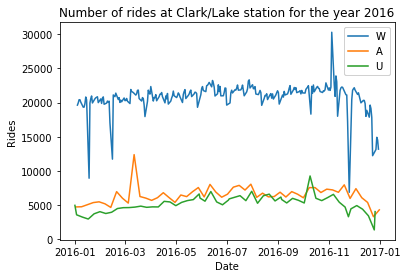

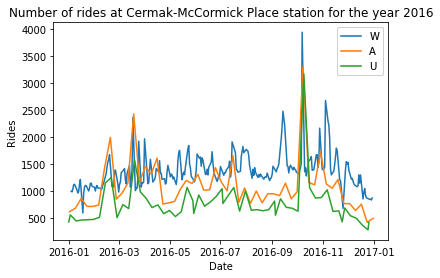

In [45]:
#plot the number of rides at the most popular and the least popular stations 
# for the year 2016 
plot_lines = []
for frame in [Clark_lake_rides_1, Clark_lake_rides_2, Clark_lake_rides_3]:
    temp, = plt.plot(frame['date'], frame['rides'])
    plot_lines.append(temp)

legend1=plt.legend(plot_lines, ["W", "A", "U"], loc=1)
plt.gca().add_artist(legend1)
plt.xlabel('Date')
plt.ylabel('Rides')
plt.title('Number of rides at Clark/Lake station for the year 2016')
plt.show()

plot_lines = []
for frame in [Cermak_McCormick_rides_1, Cermak_McCormick_rides_2, Cermak_McCormick_rides_3]:
    temp, = plt.plot(frame['date'], frame['rides'])
    plot_lines.append(temp)

legend1=plt.legend(plot_lines, ["W", "A", "U"], loc=1)
plt.gca().add_artist(legend1)
plt.xlabel('Date')
plt.ylabel('Rides')
plt.title('Number of rides at Cermak-McCormick Place station for the year 2016')
plt.show()

The above two plots show the number of passengers on Weekdays(W), Saturday(A), Holiday/Sunday(U) at Clark/Lake Station (most popular) and Cermak-McCormick Place Station (least popular) for the year 2016. There is a stark difference between the number of rides at these two stations.

For Clark/Lake, typically there is a huge gap between the number of riders on weekdays vs the other days except for a few downward spikes which could be because of bad weather (Chicago has extreme winter) and people didn't go to work. The huge gap between weekdays and the other days is intuitive since people use the trains to go to work.

For Cermak-McCormick Place, the gap between weekdays and other days is not large. This could be because this station is newly built or it's not located at a place where many businesses are set up in Chicago.



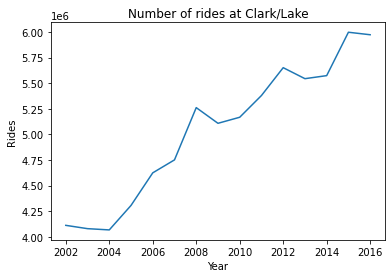

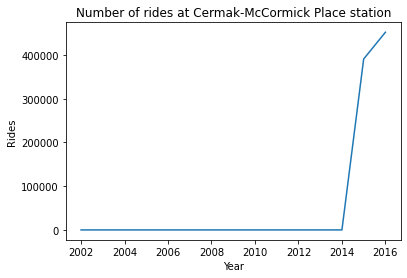

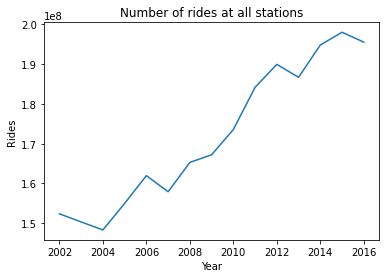

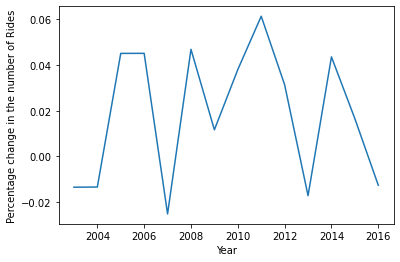

In [46]:
# analyze change in number of rides with years
year = 2002
passengers = []
years = []
while year < 2017:
  df = L_rides_train[(L_rides_train['stationname'] == 'Clark/Lake') &
                       (L_rides_train['date'] >= '01/01/'+str(year)) &
                       (L_rides_train['date'] <= '12/31/'+str(year))]
  passengers.append(df['rides'].sum())
  years.append(year)
  year += 1
plt.plot(years,passengers)
plt.xlabel('Year')
plt.ylabel('Rides')
plt.title('Number of rides at Clark/Lake')
plt.show()

year = 2002
passengers = []
years = []
while year < 2017:
  df = L_rides_train[(L_rides_train['stationname'] == 'Cermak-McCormick Place') &
                       (L_rides_train['date'] >= '01/01/'+str(year)) &
                       (L_rides_train['date'] <= '12/31/'+str(year))]
  passengers.append(df['rides'].sum())
  years.append(year)
  year += 1
plt.plot(years,passengers)
plt.xlabel('Year')
plt.ylabel('Rides')
plt.title('Number of rides at Cermak-McCormick Place station') 
plt.show()

year = 2002
passengers = []
years = []
while year < 2017:
  df = L_rides_train[(L_rides_train['date'] >= '01/01/'+str(year)) &
                       (L_rides_train['date'] <= '12/31/'+str(year))]
  passengers.append(df['rides'].sum())
  years.append(year)
  year += 1
plt.plot(years,passengers)
plt.xlabel('Year')
plt.ylabel('Rides')
plt.title('Number of rides at all stations')
plt.show()
arr = []
length = len(passengers)
for i in range(1,length):
  temp = (passengers[i]-passengers[i-1])/passengers[i-1]
  arr.append(temp)
plt.plot(years[1:],arr)
plt.xlabel('Year')
plt.ylabel('Percentage change in the number of Rides')
#plt.title('Number of rides at Cermak-McCormick Place station') 
plt.show()

The number of rides typically increase every year for the most popular station and for all the stations combined. It decreases by a small number for some years. But the overall trend is increasing. 

One interesting observation is that for Cermak-McCormick Place station (least popular station), it is the least opular because it started functioning in 2015. That's why we have a horizontal line upto the year 2015. Initially I thought that maybe there are some stations that don't contribute much to the total number of rides and we could ignore them. But this tells us that the reason for them having small number of rides as compared to other stations is because they started functioning recently or were under maintenence. 

For the year 2016, Clark/Lake station gave \~6MM rides (\~3% of the total rides) while Cermak-McCormick Place station gave \~400K rides (\~0.2% of the total rides). Although the percentage share of the rides by Cermak-McCormick Place station is one order magnitude lesser than the share of rides by Clarl/Lake station, it's not significantly lesser. So, it wouldn't be wise to ignore less popular stations.

The fourth plot shows that the total number of rides change by a maximum of 6% across years. This change is small.

In [47]:
# restricting the dataset to atleast 100 rides
l1 = len(L_rides_train[L_rides_train['rides']<100])/779648
print('Proportion of training data that has less than 100 rides:', l1)
L_rides_train = L_rides_train[L_rides_train['rides'] >= 100]
l2 = len(L_rides_test[L_rides_test['rides']<100])/52713
print('Proportion of test data that has less than 100 rides:', l2)
L_rides_test = L_rides_test[L_rides_test['rides'] >= 100]

Proportion of training data that has less than 100 rides: 0.016345838121819077
Proportion of test data that has less than 100 rides: 0.01026312294879821


# **Setting up the Model**
Since the feature vectors are categorical, linear regression wouldn't work. So, in my opinion, the best strategy would be to use tree based algorithms. 

Since common libraries like sklearn, xgboost require feature vectors to be numeric, it's necessary to encode the feature vectors:


1.   Weekdays are replaced by 0, Saturdays are replaced by 1, and Holidays/Sunday are replaced by 2.
2.   Dates are replaced by day of the year starting from Jan 1 of that particular year. For example, 02/03/2009 will be encoded by 34.
3.   Station name feature is dropped since we already have station id for unique identification

The reason to encode date as day of the year is because number of rides may have dependence for the same day across years. For example, Dec 25 2010(Christmas) may have dependence with Dec 25 2009, Dec 25 2008 and so on. This encoding will also make sure that the model recognizes pattern between rides on a few consecutive days.


To find out which algorithm works well, I will use 20% of the data from 2016 as dev set while the remaining will be used for training.

In [48]:
#Numerically encode
df_2016 = L_rides_train[(L_rides_train['date'] >= '01/01/2016') &
                       (L_rides_train['date'] <= '12/31/2016')]
df_2016 = df_2016.replace('W', 0)
df_2016 = df_2016.replace('A', 1)
df_2016 = df_2016.replace('U', 2)
#replacing date with day of the year
df_2016['date'] = df_2016['date'].dt.dayofyear 
#drop station name as we already have station id which uniquely tells the station
df_2016 = df_2016.drop('stationname',axis=1) 
data_2016 = df_2016.to_numpy()
shuffle_perm = np.random.permutation(data_2016.shape[0])
# randomly shuffle data
data_2016 = data_2016[shuffle_perm]
#take 80% of the data in 2016 as training data and the remaining as the dev set
train_x_2016 = data_2016[:int(0.8 * data_2016.shape[0]), :-1]
train_y_2016 = data_2016[:int(0.8 * data_2016.shape[0]), -1]
dev_x = data_2016[int(0.8 * data_2016.shape[0]):,:-1]
dev_y = data_2016[int(0.8 * data_2016.shape[0]):,-1]

### **Error analysis on training and dev set: Increasing training data by incrementally including past year's data**

In [25]:
year = 2015
error_arr = []
while year >= 2010:
  df_1 = L_rides_train[(L_rides_train['date'] >= '01/01/'+str(year)) &
                       (L_rides_train['date'] <= '12/31/2015')]
  df_1 = df_1.replace('W', 0)
  df_1 = df_1.replace('A', 1)
  df_1 = df_1.replace('U', 2)
  #replacing date with day of the year
  df_1['date'] = df_1['date'].dt.dayofyear 
  #drop station name as we already have station id which uniquely tells the station
  df_1 = df_1.drop('stationname',axis=1) 
  data_1 = df_1.to_numpy()
  train_x_1 = data_1[:,:-1]
  train_y_1 = data_1[:,-1]
  train_x = np.vstack((train_x_1, train_x_2016)) # training set
  train_y = np.concatenate((train_y_1, train_y_2016)) # dev set

  temp = [year] # to store error

  # Random Forest Regression
  regr = RandomForestRegressor()
  regr.fit(train_x, train_y)
  pred_y_dev_rf = regr.predict(dev_x)
  pred_y_train_rf = regr.predict(train_x)
  temp.append(np.mean(np.absolute((pred_y_train_rf-train_y))/train_y))
  temp.append(np.mean(np.absolute((pred_y_dev_rf-dev_y)/dev_y)))

  # XGBoost Regression
  xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.2,
                 alpha = 10, n_estimators = 1000)
  xg_reg.fit(train_x,train_y)
  pred_y_dev_xg = xg_reg.predict(dev_x)
  pred_y_train_xg = xg_reg.predict(train_x)
  temp.append(np.mean(np.absolute((pred_y_train_xg-train_y))/train_y))
  temp.append(np.mean(np.absolute((pred_y_dev_xg-dev_y)/dev_y)))

  error_arr.append(temp) # errors for the included history
  year -= 1
# takes about 11 minutes to run this cell

In [26]:
df_error = pd.DataFrame(np.array(error_arr),
           columns=['Historical Data until year', 'Random Forest: Training Error',
           'Random Forest: Dev Error', 'XGBoost: Training Error', 'XGBoost: Dev Error'])
df_error

,Historical Data until year,Random Forest: Training Error,Random Forest: Dev Error,XGBoost: Training Error,XGBoost: Dev Error
0,2015.0,0.044702,0.098903,0.158471,0.166561
1,2014.0,0.051636,0.111430,0.158389,0.170306
2,2013.0,0.064817,0.128808,0.170736,0.185571
3,2012.0,0.069640,0.122866,0.172253,0.183225
4,2011.0,0.072781,0.122805,0.171195,0.180038
5,2010.0,0.080885,0.126180,0.171306,0.177588


Observations:


1.   Random Forest model has low bias and high variance.
2.   XGBoost model has high bias and low variance.
3.   Including more historical data increases training error and dev error for both the models.
4.   Random Forest performs better

It's best to include historical data only until the year 2015 since performance deteriorates if we add data from previous years. Looking at the error values, it's clear that Random Forest performs better than XGBoost.  

In [49]:
# create train and dev set based on the observations above
df_1 = L_rides_train[(L_rides_train['date'] >= '01/01/2015') &
                       (L_rides_train['date'] <= '12/31/2016')]
df_1 = df_1.replace('W', 0)
df_1 = df_1.replace('A', 1)
df_1 = df_1.replace('U', 2)
#replacing date with day of the year
df_1['date'] = df_1['date'].dt.dayofyear 
#drop station name as we already have station id which uniquely tells the station
df_1 = df_1.drop('stationname',axis=1) 
data_1 = df_1.to_numpy()
train_x = data_1[:,:-1]
train_y = data_1[:,-1]

## **Cross Validation**

In [51]:
# Create the parameter grid
param_grid = {
    'bootstrap': [True],
    'max_depth': [80,100,120],
    #'max_features': 'auto',
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [10,12],
    'n_estimators': [100,150,200]
}
# Create a model
rf = RandomForestRegressor()
# scoring function
def mean_percentage_error(y_true, y_pred):
  return np.mean(np.absolute((y_pred-y_true)/y_true))

# parameter to input in grid search CV
my_scorer = make_scorer(mean_percentage_error, greater_is_better=False)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, scoring = my_scorer,
                           param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(train_x, train_y)
grid_search.best_params_
# takes about 25 minutes to run

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 25.7min finished


{'bootstrap': True,
 'max_depth': 120,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 150}

In [53]:
#choose the best estimator as the model
best_score = -1*grid_search.best_score_ #multily by -1 because how it's defined
print('Mean Cross Validation Percentage error of the best estimator:',best_score)

Mean Cross Validation Percentage error of the best estimator: 0.09384692768377335


In [54]:
# best estimator found in grid search CV
best_grid = grid_search.best_estimator_

In [55]:
# save 
joblib.dump(best_grid, "model.joblib")

In [50]:
# load
model_rf = joblib.load("model.joblib")

## **Test on the data for the year 2017**

In [51]:
#test
df_test = L_rides_test
df_test = df_test.replace('W', 0)
df_test = df_test.replace('A', 1)
df_test = df_test.replace('U', 2)
#replacing date with day of the year
df_test['date'] = df_test['date'].dt.dayofyear 
#drop station name as we already have station id which uniquely tells the station
df_test = df_test.drop('stationname',axis=1)
# considering data points only with atleast 100 rides 
df_test = df_test[df_test['rides']>=100] 
data_test = df_test.to_numpy()
test_x = data_test[:,:-1]
test_y = data_test[:,-1]
pred_test_y =  model_rf.predict(test_x) # predict with trained model
print('test error:', np.mean(np.absolute((pred_test_y-test_y))/test_y))

test error: 0.125030784739393


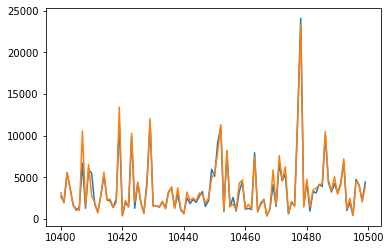

In [52]:
x = np.arange(test_y.shape[0])
plt.plot(x[10400:10500],test_y[10400:10500])
#plt.plot(x,pred_y)
#plt.show()
plt.plot(x[10400:10500],pred_test_y[10400:10500])
plt.show()

The orange line above is the predicted model and blue line is the true data for randomly selected 100 data points. We can see that the orange line overlaps the blue line at most of the data points. 

## **Checking error in the top 80 percentile of the total rides in 2017**

In [96]:
sum_rides = df_test['rides'].sum() # total sum of rides
df_test['rides_pred'] = pred_test_y.tolist()
# sort the test data in descending order of daily rides
df_test_sort = df_test.sort_values(ascending=False,by='rides')
# create a numy array
sort_arr = df_test_sort.to_numpy()
top_sum = 0 # maintain the sum of rides in the loop
err_perc = 0
i = 0
while True:
  top_sum += sort_arr[i,-2]
  err_perc += np.absolute(sort_arr[i,-1]-sort_arr[i,-2])/sort_arr[i,-2]
  i += 1
  if top_sum/sum_rides >= 0.8:
    break
  
print('Total number of points in test set:', sort_arr.shape[0])
print('Number of points that constitute 80% of the total rides:', i)
print('Mean percentage error in top 80% rides:', err_perc/i)
#sort_arr[i+1,-2]

Total number of points in test set: 52172
Number of points that constitute 80% of the total rides: 24505
Mean percentage error in top 80% rides: 0.09435781845384708


## **Monthly Mean Percentage Error**

In [98]:
# create an array for start date and end date for every month
month_start = ['01/01/2017','02/01/2017', '03/01/2017', '04/01/2017',
               '05/01/2017', '06/01/2017', '07/01/2017', '08/01/2017',
               '09/01/2017', '10/01/2017', '11/01/2017', '12/01/2017']
month_end = ['01/31/2017','02/28/2017', '03/31/2017', '04/30/2017',
               '05/31/2017', '06/30/2017', '07/31/2017', '08/31/2017',
               '09/30/2017', '10/31/2017', '11/30/2017', '12/31/2017']
month = ['January', 'February', 'March', 'April', 'May', 'June',
         'July', 'August', 'September', 'October','November', 'December']
arr = [] # to store monthly mean error
# considering data points only with atleast 100 rides 
df_temp = L_rides_test[L_rides_test['rides']>=100]
df_temp['rides_pred'] = pred_test_y.tolist()
for i in range(12):
  # create dataframe for each month
  df_temp2 = df_temp[(df_temp['date'] >= month_start[i]) &
                       (df_temp['date'] <= month_end[i])]
  month_data = df_temp2.to_numpy()
  # calculate mean error for the month
  err = np.mean(np.absolute(month_data[:,-1]-month_data[:,-2])/month_data[:,-2])
  arr.append([month[i], err])

arr = np.array(arr)
df_monthly_error = pd.DataFrame(np.array(arr),
                   columns=['Month', 'Mean percentage error'])
df_monthly_error

,Month,Mean percentage error
0,January,0.13158016236060258
1,February,0.08999965018994432
2,March,0.11095336344537025
3,April,0.11010187854159138
4,May,0.10555043983965101
5,June,0.11180857706318517
6,July,0.13245677428393485
7,August,0.11343005018778742
8,September,0.12071020937874247
9,October,0.13664684566506632


In [100]:
ar = arr[:,1]
ar = ar.astype(np.float)
np.mean(ar)
print('Mean of monthly mean percentage error:', np.mean(ar))
print('Test error / Mean of daily percentage error:', np.mean(np.absolute((pred_test_y-test_y))/test_y))

Mean of monthly mean percentage error: 0.12478265948224654
Test error / Mean of daily percentage error: 0.125030784739393
